# Calibrated Optimal Model Analysis

In [1]:
import sys
import pickle
import pandas as pd
import numpy as np
import math
from datetime import datetime
import dateutil
import copy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression

In [2]:
import sys
sys.path.insert(1, '../python/')
from epidemic_model import *
import init_model
import data_mgmt

In [3]:
sns.set(style="ticks")

In [4]:
#__MOD_NAME = "ModNat_v9-test_broad-err1-abs"
__MOD_NAME = "Model-v1_err1abs"
__SAVED_MOD_PATH = "saved_models/"
__PRED_DAYS = 150
__DATE_CURR = '2020-04-14'
__MACRO_GEO = 'ita'

np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [5]:
"""
fName = __SAVED_MOD_PATH + __MOD_NAME
with open(fName, 'rb') as f:
    try:
        opt_mod_obj = pickle.load(f)
    except:
        print("error")

import_data = data_mgmt.ImportData("covid_ita_regional.csv")
"""
import_data, opt_mod_obj = init_model.getData(
    geo = __MACRO_GEO, 
    obj_path = __SAVED_MOD_PATH, 
    mod_name = __MOD_NAME,
    rel_path="../")

# High-level comparison by geo

## Parameter sensibility

- Get list of all parameters for all regions in tabular format
- Plot multi-dim scatter plot:
    - (rg, ra, t1, ta2), (rg, ra, alpha, gamma), (beta, beta_gcn, tgi2, tgn2), (Igs, Ias, t1, t2)
    - (rg, ra, t1, err), (rg, ra, ta2, err), (alpha, gamma, beta, err), (Igs, Ias, ta2, err)

In [28]:
mod_type = 'opt'
mod_name = 'tot'

geo_list = opt_mod_obj['model'].values()
geo_codes = opt_mod_obj['model'].keys()
data = {
    'geo_code': [x for x in geo_codes],
    'area': [x['name'][0] for x in geo_list],
    'rg': [x[mod_type][mod_name]['mod'].params['rg'] for x in geo_list],
    'ra': [x[mod_type][mod_name]['mod'].params['ra'] for x in geo_list],
    'alpha': [x[mod_type][mod_name]['mod'].params['alpha'] for x in geo_list],
    'beta': [x[mod_type][mod_name]['mod'].params['beta'] for x in geo_list],
    'beta_gcn': [x[mod_type][mod_name]['mod'].params['beta_gcn'] for x in geo_list],
    'gamma': [x[mod_type][mod_name]['mod'].params['gamma'] for x in geo_list],
    't1': [x[mod_type][mod_name]['mod'].params['t1'] for x in geo_list],
    'tgi2': [x[mod_type][mod_name]['mod'].params['tgi2'] for x in geo_list],
    'tgn2': [x[mod_type][mod_name]['mod'].params['tgn2'] for x in geo_list],
    'ta2': [x[mod_type][mod_name]['mod'].params['ta2'] for x in geo_list],
    'Igs_t': [x[mod_type][mod_name]['mod'].Igs_t[0] for x in geo_list],
    'Ias_t': [x[mod_type][mod_name]['mod'].Ias_t[0] for x in geo_list],
    'err_tot': [x[mod_type][mod_name]['err_tot'] for x in geo_list]
}

df = pd.DataFrame(data)


mod_type = 'opt_window'
geo_list = opt_mod_obj['model'].values()
data_window = {
# This needs to be fixed above
    'geo_code': [x for x in geo_codes],
    'area': [x['name'][0] for x in geo_list],
    'rg': [x[mod_type][mod_name]['mod'].params['rg'] for x in geo_list],
    'ra': [x[mod_type][mod_name]['mod'].params['ra'] for x in geo_list],
    'rg_period': [x[mod_type][mod_name]['mod'].rg_period[-1] if x[mod_type][mod_name]['mod'].rg_period is not None else x[mod_type][mod_name]['mod'].params['rg'] for x in geo_list],
    'ra_period': [x[mod_type][mod_name]['mod'].ra_period[-1] if x[mod_type][mod_name]['mod'].ra_period is not None else x[mod_type][mod_name]['mod'].params['ra'] for x in geo_list],
    'alpha': [x[mod_type][mod_name]['mod'].params['alpha'] for x in geo_list],
    'beta': [x[mod_type][mod_name]['mod'].params['beta'] for x in geo_list],
    'beta_gcn': [x[mod_type][mod_name]['mod'].params['beta_gcn'] for x in geo_list],
    'gamma': [x[mod_type][mod_name]['mod'].params['gamma'] for x in geo_list],
    't1': [x[mod_type][mod_name]['mod'].params['t1'] for x in geo_list],
    'tgi2': [x[mod_type][mod_name]['mod'].params['tgi2'] for x in geo_list],
    'tgn2': [x[mod_type][mod_name]['mod'].params['tgn2'] for x in geo_list],
    'ta2': [x[mod_type][mod_name]['mod'].params['ta2'] for x in geo_list],
    'Igs_t': [x[mod_type][mod_name]['mod'].Igs_t[0] for x in geo_list],
    'Ias_t': [x[mod_type][mod_name]['mod'].Ias_t[0] for x in geo_list],
    'err_tot': [x[mod_type][mod_name]['err_tot'] for x in geo_list]
}

df_window = pd.DataFrame(data_window)

In [29]:
df.sort_values('area')

,geo_code,area,rg,ra,alpha,beta,beta_gcn,gamma,t1,tgi2,tgn2,ta2,Igs_t,Ias_t,err_tot
5,13,Abruzzo,0.064356,0.011707,0.740446,0.069929,0.003373,0.168831,6,10,38,6,112,0,19.374702
13,17,Basilicata,0.177092,0.288922,1.529985,0.003359,0.003969,0.097114,3,15,33,3,2,2,4.488390
15,18,Calabria,0.090428,0.037447,1.100385,0.015591,0.005391,0.071674,6,9,33,3,63,1,8.985909
9,15,Campania,0.039052,0.025393,0.950000,0.005069,0.006196,0.101969,6,8,39,24,159,1,27.783049
16,8,Emilia-Romagna,0.244420,0.465548,0.855000,0.004232,0.012697,0.017498,4,32,22,4,110,1,622.606804
12,6,Friuli Venezia Giulia,0.217800,0.977680,0.855000,0.180428,0.003609,0.090069,4,9,13,3,1,2,125.226008
2,12,Lazio,0.061133,0.575848,0.432165,0.017010,0.004553,0.082277,3,15,23,3,169,0,61.146544
14,7,Liguria,0.079200,0.665500,0.550800,0.005445,0.014850,0.072963,4,12,20,3,121,2,115.297301
6,3,Lombardia,0.266200,0.341402,0.940500,0.155824,0.012029,0.102999,4,13,17,2,127,207,1644.529686
0,11,Marche,0.059213,1.423542,0.680170,0.089378,0.004781,0.113042,8,20,26,3,138,1,57.169420


In [30]:
df_window.sort_values('area')

,geo_code,area,rg,ra,rg_period,ra_period,alpha,beta,beta_gcn,gamma,t1,tgi2,tgn2,ta2,Igs_t,Ias_t,err_tot
5,13,Abruzzo,0.064356,0.011707,0.080792,0.375265,0.740446,0.069929,0.003373,0.168831,6,10,38,6,112,0,19.374702
13,17,Basilicata,0.177092,0.288922,0.157188,0.316997,1.529985,0.003359,0.003969,0.097114,3,15,33,3,2,2,4.488390
15,18,Calabria,0.090428,0.037447,0.099617,0.451720,1.100385,0.015591,0.005391,0.071674,6,9,33,3,63,1,8.985909
9,15,Campania,0.039052,0.025393,0.044641,0.488713,0.950000,0.005069,0.006196,0.101969,6,8,39,24,159,1,27.783049
16,8,Emilia-Romagna,0.244420,0.465548,0.244420,0.465548,0.855000,0.004232,0.012697,0.017498,4,32,22,4,110,1,622.606804
12,6,Friuli Venezia Giulia,0.234789,1.558818,0.160364,0.967903,0.855000,0.130216,0.002131,0.106814,4,9,17,3,1,2,41.900145
2,12,Lazio,0.063547,0.541585,0.105415,0.490001,0.432165,0.018711,0.004553,0.074049,3,18,23,3,169,0,58.986748
14,7,Liguria,0.079200,0.665500,0.079200,0.665500,0.550800,0.005445,0.014850,0.072963,4,12,20,3,121,2,115.297301
6,3,Lombardia,0.322102,0.276535,0.239580,0.375542,0.940500,0.113596,0.010717,0.150801,4,9,20,2,127,207,1148.863100
0,11,Marche,0.059213,1.423542,0.118287,0.506931,0.680170,0.089378,0.004781,0.113042,8,20,26,3,138,1,57.169420


In [31]:
stats_param = {
    'rg': [round(df_window['rg'].min(), 4), round(df_window['rg'].mean(), 4), round(df_window['rg'].median(), 4), round(df_window['rg'].max(), 4)],
    'ra': [round(df_window['ra'].min(), 4), round(df_window['ra'].mean(), 4), round(df_window['ra'].median(), 4), round(df_window['ra'].max(), 4)],
    'rg_period': [round(df_window['rg_period'].min(), 4), round(df_window['rg_period'].mean(), 4), round(df_window['rg_period'].median(), 4), round(df_window['rg_period'].max(), 4)],
    'ra_period': [round(df_window['ra_period'].min(), 4), round(df_window['ra_period'].mean(), 4), round(df_window['ra_period'].median(), 4), round(df_window['ra_period'].max(), 4)],
    'alpha': [round(df_window['alpha'].min(), 4), round(df_window['alpha'].mean(), 4), round(df_window['alpha'].median(), 4), round(df_window['alpha'].max(), 4)],
    'beta': [round(df_window['beta'].min(), 4), round(df_window['beta'].mean(), 4), round(df_window['beta'].median(), 4), round(df_window['beta'].max(), 4)],
    'beta_gcn': [round(df_window['beta_gcn'].min(), 4), round(df_window['beta_gcn'].mean(), 4), round(df_window['beta_gcn'].median(), 4), round(df_window['beta_gcn'].max(), 4)],
    'gamma': [round(df_window['gamma'].min(), 4), round(df_window['gamma'].mean(), 4), round(df_window['gamma'].median(), 4), round(df_window['gamma'].max(), 4)],
    't1': [round(df_window['t1'].min(), 4), round(df_window['t1'].mean(), 4), round(df_window['t1'].median(), 4), round(df_window['t1'].max(), 4)],
    'tgi2': [round(df_window['tgi2'].min(), 4), round(df_window['tgi2'].mean(), 4), round(df_window['tgi2'].median(), 4), round(df_window['tgi2'].max(), 4)],
    'tgn2': [round(df_window['tgn2'].min(), 4), round(df_window['tgn2'].mean(), 4), round(df_window['tgn2'].median(), 4), round(df_window['tgn2'].max(), 4)],
    'ta2': [round(df_window['ta2'].min(), 4), round(df_window['ta2'].mean(), 4), round(df_window['ta2'].median(), 4), round(df_window['ta2'].max(), 4)],
    'Igs_t': [round(df_window['Igs_t'].min(), 4), round(df_window['Igs_t'].mean(), 4), round(df_window['Igs_t'].median(), 4), round(df_window['Igs_t'].max(), 4)],
    'Ias_t': [round(df_window['Ias_t'].min(), 4), round(df_window['Ias_t'].mean(), 4), round(df_window['Ias_t'].median(), 4), round(df_window['Ias_t'].max(), 4)]
}

for param in stats_param.keys():
    print(param + ": \t" + str(stats_param[param]))

rg: 	[0.0391, 0.1173, 0.0851, 0.3221]
ra: 	[0.0117, 0.5013, 0.3994, 1.5588]
rg_period: 	[0.0446, 0.114, 0.0938, 0.2444]
ra_period: 	[0.2187, 0.5069, 0.4586, 1.1287]
alpha: 	[0.1909, 0.7632, 0.7977, 1.53]
beta: 	[0.0027, 0.0535, 0.0213, 0.1476]
beta_gcn: 	[0.0012, 0.0058, 0.0049, 0.0148]
gamma: 	[0.0175, 0.1051, 0.0976, 0.2234]
t1: 	[3, 5.5, 4.5, 11]
tgi2: 	[5, 14.6, 10.5, 37]
tgn2: 	[17, 27.65, 28.0, 39]
ta2: 	[2, 5.3, 3.5, 24]
Igs_t: 	[1, 100.9, 111.0, 252]
Ias_t: 	[0, 42.8, 2.0, 224]


# Optimal Model Focus

## Model choice

In [10]:
geo_code = 1
if(geo_code == 'aggr'):
    data_uff = data_mgmt.ActualData(import_data.data_aggr)
else:
    data_uff = data_mgmt.ActualData(
        import_data.data[import_data.data['geo_code'] == geo_code].reset_index()
    )

opt_model = opt_mod_obj['model'][geo_code]['opt']
opt_model_window = opt_mod_obj['model'][geo_code]['opt_window']

print("Geo: ", opt_mod_obj['model'][geo_code]['name'])

Geo:  ['Piemonte']


In [11]:
(opt_model['tot']['period'], opt_model['tot']['i_start'])

(44, 5)

In [12]:
NIgs = (1+opt_model['tot']['mod'].rg)**opt_model['tot']['mod'].t1
NIas = (1+opt_model['tot']['mod'].ra)**opt_model['tot']['mod'].ta2
print(NIgs)
print(NIas)

1.583333909883101
3.1601777896294316


In [13]:
Igs_weight = np.array(opt_model_window['tot']['mod'].Igs_t)/(np.array(opt_model_window['tot']['mod'].Igs_t) + np.array(opt_model_window['tot']['mod'].Ias_t))
Ias_weight = np.array(opt_model_window['tot']['mod'].Ias_t)/(np.array(opt_model_window['tot']['mod'].Igs_t) + np.array(opt_model_window['tot']['mod'].Ias_t))

NIgs_window = [(1+x)**opt_model_window['tot']['mod'].t1 for x in opt_model_window['tot']['mod'].rg_period]
NIas_window = [(1+x)**opt_model_window['tot']['mod'].ta2 for x in opt_model_window['tot']['mod'].ra_period]
R0 = Igs_weight * np.array(NIgs_window) + Ias_weight * np.array(NIas_window)

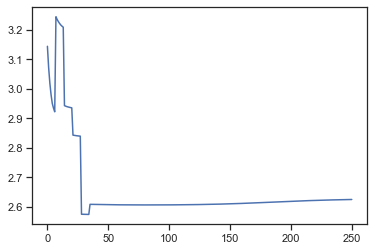

In [14]:
plt.plot(R0)


In [15]:
model_name = 'tot'
params_opt = opt_model[model_name]['mod'].params
params_opt_window = opt_model_window[model_name]['mod'].params
for param_name in params_opt.keys():
    if param_name not in ['rg_period', 'ra_period']:
        print("%10s: %7.4f  %7.4f" %(param_name, params_opt[param_name], params_opt_window[param_name]))

        rg:  0.1217   0.1188
        ra:  0.3333   0.3332
     alpha:  0.1909   0.1909
      beta:  0.1319   0.1122
  beta_gcn:  0.0046   0.0035
     gamma:  0.1020   0.1009
        t1:  4.0000   4.0000
      tgi2: 22.0000  24.0000
      tgn2: 21.0000  24.0000
       ta2:  4.0000   4.0000
    Igs_t0:  2.0000   2.0000
   Igci_t0:  0.0000   0.0000
   Igcn_t0:  0.0000   0.0000
    Ias_t0: 224.0000  224.0000
      M_t0:  0.0000   0.0000
   Ggci_t0:  0.0000   0.0000
   Ggcn_t0:  0.0000   0.0000
    Gas_t0:  0.0000   0.0000
   Pop_tot: 4356406.0000  4356406.0000


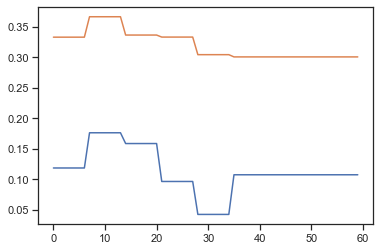

In [16]:
geo = geo_code
mod_type = 'opt_window'
plt.plot(opt_mod_obj['model'][geo][mod_type][mod_name]['mod'].params['rg_period'][:60])
plt.plot(opt_mod_obj['model'][geo][mod_type][mod_name]['mod'].params['ra_period'][:60])

# Model Statistics & Predictions

In [17]:
print(len(opt_model[model_name]['mod_data']['dat_Igci_t']))
opt_model[model_name]['mod'].run(400)
mod_data = mod_dat(opt_model[model_name]['mod'])
opt_model[model_name]['mod_data'] = mod_data
print(len(opt_model[model_name]['mod_data']['dat_Igci_t']))

251


AttributeError: 'Model' object has no attribute 'R0_t'

In [ ]:
date_curr = __DATE_CURR
#date_curr = '2020-03-26'
#model_name = 'tot'
stats = ModelStats(opt_model[model_name], data_uff)
print("Date: " + __DATE_CURR)
stats.printKpis(date_curr)

In [ ]:
stats_window = ModelStats(opt_model_window[model_name], data_uff)
stats_window.printKpis(date_curr)

In [ ]:
date_Igc_cum = stats.data['mod_Igc_cum'].idxmax()
date_Igc = stats.data['mod_Igc'].idxmax()
peak = {
    'Igc_cum': (stats.data['mod_Igc_cum'].idxmax(), format_number(stats.data['mod_Igc_cum'].max())),
    'Igc': (stats.data['mod_Igc'].idxmax(), format_number(stats.data['mod_Igc'].max())),
    'Igci': (stats.data['mod_Igci_t'].idxmax(), format_number(stats.data['mod_Igci_t'].max())),
    'M': (stats.data['mod_M'].idxmax(), format_number(stats.data['mod_M'].max())),
    'M_cum': (stats.data['mod_M_cum'].idxmax(), format_number(stats.data['mod_M_cum'].max())),
    #'Popi': (format_number(stats.data.loc[date_Igc_cum, 'mod_Popi_t']), format_number(stats.data.loc[date_Igc, 'mod_Popi_t']))
}
peak_window = {
    'Igc_cum': (stats_window.data['mod_Igc_cum'].idxmax(), format_number(stats_window.data['mod_Igc_cum'].max())),
    'Igc': (stats_window.data['mod_Igc'].idxmax(), format_number(stats_window.data['mod_Igc'].max())),
    'Igci': (stats_window.data['mod_Igci_t'].idxmax(), format_number(stats_window.data['mod_Igci_t'].max())),
    'M': (stats_window.data['mod_M'].idxmax(), format_number(stats_window.data['mod_M'].max())),
    'M_cum': (stats_window.data['mod_M_cum'].idxmax(), format_number(stats_window.data['mod_M_cum'].max())),
    #'Popi': (format_number(stats_window.data.loc[date_Igc_cum, 'mod_Popi_t']), format_number(stats_window.data.loc[date_Igc, 'mod_Popi_t']))
}

In [ ]:
peak

In [ ]:
peak_window

In [ ]:
l = ['rg', 'ra', 'beta', 'beta_gcn', 'gamma']
print(len([x for x in['t1', 'tgi2', 'tgn2', 'ta2'] if x in l]))

# Model Performance

## Optimal Model

In [ ]:
#Models dynamics
pred_days = __PRED_DAYS
pred_days = 244
graphOptAll('tot', opt_model, data_uff, var_name_uff = 'dat_Igc_cum', pred_days=pred_days)
graphOptAll('Igc_cum', opt_model, data_uff, var_name_uff = 'dat_Igc_cum', pred_days=pred_days)
graphOptAll('Igc', opt_model, data_uff, var_name_uff = 'dat_Igc_cum', pred_days=pred_days)
graphOptAll('Gc_cum', opt_model, data_uff, var_name_uff = 'dat_Igc_cum', pred_days=pred_days)
graphOptAll('M_cum', opt_model, data_uff, var_name_uff = 'dat_Igc_cum', pred_days=pred_days)

In [ ]:
def graphAllCompAct(var_name, opt_mod, data_uff):
    #var_name = 'dat_Igc_cum'
    #opt_mod = mod_optimizer.opt_model


    plt.figure(figsize = (10,7))
    #data_uff_istart = data_uff.i_start


    plt.plot(getattr(data_uff, var_name)[data_uff.i_start:], label = "UFF")
    plotOptModLine(var_name, opt_mod, 'tot', 'tot')
    plotOptModLine(var_name, opt_mod, 'Igc_cum', 'Igc_cum')
    plotOptModLine(var_name, opt_mod, 'Igc', 'Igc')
    #plotOptModLine(var_name, opt_mod, 'Gc_cum', 'Gc_cum')
    plotOptModLine(var_name, opt_mod, 'M_cum', 'M_cum')
    #plt.ylim((0,20000))
    plt.xlabel('giorni')
    plt.ylabel('n. persone')
    plt.title('Actual vs Model: ' + var_dic[var_name])
    plt.legend()
    plt.show()

In [ ]:
# One variable per comparison, actual vs all models
graphAllCompAct('dat_Igc_cum', opt_model, data_uff)
graphAllCompAct('dat_Igc', opt_model, data_uff)
graphAllCompAct('dat_Igci_t', opt_model, data_uff)
graphAllCompAct('dat_Igcn_t', opt_model, data_uff)
graphAllCompAct('dat_Gc_cum', opt_model, data_uff)
graphAllCompAct('dat_M_cum', opt_model, data_uff)

## Optimized Window Model

In [ ]:
#Models dynamics
#pred_days = 100
pred_days = __PRED_DAYS
#pred_days = 10
graphOptAll('tot', opt_model_window, data_uff, var_name_uff = 'dat_Igc_cum', pred_days=pred_days)
graphOptAll('Igc_cum', opt_model_window, data_uff, var_name_uff = 'dat_Igc_cum', pred_days=pred_days)
graphOptAll('Igc', opt_model_window, data_uff, var_name_uff = 'dat_Igc_cum', pred_days=pred_days)
graphOptAll('Gc_cum', opt_model_window, data_uff, var_name_uff = 'dat_Igc_cum', pred_days=pred_days)
graphOptAll('M_cum', opt_model_window, data_uff, var_name_uff = 'dat_Igc_cum', pred_days=pred_days)

In [ ]:
# One variable per comparison, actual vs all models

graphAllCompAct('dat_Igc_cum', opt_model_window, data_uff)
graphAllCompAct('dat_Igc', opt_model_window, data_uff)
graphAllCompAct('dat_Igci_t', opt_model_window, data_uff)
graphAllCompAct('dat_Igcn_t', opt_model_window, data_uff)
graphAllCompAct('dat_Gc_cum', opt_model_window, data_uff)
graphAllCompAct('dat_M_cum', opt_model_window, data_uff)

In [ ]:
mod_name = 'tot'
graphWindowComp("dat_Igc_cum", data_uff, opt_model, opt_model_window, mod_name)
graphWindowComp("dat_Igc", data_uff, opt_model, opt_model_window, mod_name)
graphWindowComp("dat_Igci_t", data_uff, opt_model, opt_model_window, mod_name)
graphWindowComp("dat_Igcn_t", data_uff, opt_model, opt_model_window, mod_name)
graphWindowComp("dat_Gc_cum", data_uff, opt_model, opt_model_window, mod_name)
graphWindowComp("dat_M_cum", data_uff, opt_model, opt_model_window, mod_name)

In [ ]:

stats.data[['uff_Igc_cum', 'mod_Igc_cum', 'uff_Igc', 'mod_Igc', 'uff_Gc_cum', 'mod_Gc_cum', 'uff_M_cum', 'mod_M_cum']][0:50]

### Model Statistics Classes

Basics Stats
1. Valore picco e corrispondente data per serie storica
2. totale morti, totale guariti, totale infettati
3. Model Graph (tutte le curve del modello)
NB: pensa a mettere i calcoli nel modello. Questa classe la usi più per mostrare le statistiche
- creare una serie storica di una data variabile, al variare di un valore di parametro --> fare grafico


Finire Windows e trovare per ogni modello la lista di rg e ra ottimale.


Appena finito qui:
- prendere dati per regioni, e addestrare un modello per regione
- fare modello nazionale come somma dei modelli regionali, comparare con efficacia modello nazionale

Inoltre, fare procedura che scarica dati da github, e poi lancia il notebook

In [ ]:
#backup

grid_param.setGrid(Param('rg', par_min = 0.000001), grid_avg = 0.25, grid_min = 0.15, grid_max = 0.35, steps = 2)
grid_param.setGrid(Param('ra', par_min = 0.000001), grid_avg = 0.4, grid_min = 0.3, grid_max = 0.5, steps = 2)
grid_param.setGrid(Param('alpha', par_min = 0.00000001), grid_avg = 0.85, grid_min = 0.75, grid_max = 0.95, steps = 2)
grid_param.setGrid(Param('beta', par_min = 0.00000001), grid_avg = 0.05, grid_min = 0.01, grid_max = 0.1, steps = 2)
grid_param.setGrid(Param('beta_gcn', par_min = 0.00000001), grid_avg = 0.05, grid_min = 0.01, grid_max = 0.1, steps = 1)
grid_param.setGrid(Param('gamma', par_min = 0.00000001), grid_avg = 0.05, grid_min = 0.01, grid_max = 0.15, steps = 2)
grid_param.setGrid(Param('t1', par_min = 1), grid_avg = 4, grid_min = 2, grid_max = 6, steps = 2)
grid_param.setGrid(Param('tgi2', par_min = 1), grid_avg = 12, grid_min = 7, grid_max = 25, steps = 2)
grid_param.setGrid(Param('tgn2', par_min = 1), grid_avg = 12, grid_min = 7, grid_max = 25, steps = 2)
grid_param.setGrid(Param('ta2', par_min = 1), grid_avg = 6, grid_min = 4, grid_max = 12, steps = 2)
grid_param.setGrid(Param('Igs_t0', par_min = 0), grid_avg = 5, grid_min = 20, grid_max = 300, steps = 1)
grid_param.setGrid(Param('Igci_t0', par_min = 0), grid_avg = 0, grid_min = 0, grid_max = 200, steps = 1)
grid_param.setGrid(Param('Igcn_t0', par_min = 0), grid_avg = 0, grid_min = 0, grid_max = 200, steps = 1)
grid_param.setGrid(Param('Ias_t0', par_min = 0), grid_avg = 5, grid_min = 1, grid_max = 20, steps = 1)
grid_param.setGrid(Param('M_t0', par_min = 0), grid_avg = 0, grid_min = 70, grid_max = 200, steps = 1)
grid_param.setGrid(Param('Ggci_t0', par_min = 0), grid_avg = 0, grid_min = 0, grid_max = 200, steps = 1)
grid_param.setGrid(Param('Ggcn_t0', par_min = 0), grid_avg = 0, grid_min = 0, grid_max = 200, steps = 1)
grid_param.setGrid(Param('Gas_t0', par_min = 0), grid_avg = 0, grid_min = 100, grid_max = 500, steps = 1)


grid_param.setGrid(Param('rg', par_min = 0.000001), grid_avg = 0.0121253, grid_min = 0.05, grid_max = 0.25, steps = 2)
grid_param.setGrid(Param('ra', par_min = 0.000001), grid_avg = 0.4332332, grid_min = 0.3, grid_max = 0.6, steps = 2)
grid_param.setGrid(Param('alpha', par_min = 0.00000001), grid_avg = 0.55079215, grid_min = 0.35, grid_max = 0.75, steps = 2)
grid_param.setGrid(Param('beta', par_min = 0.00000001), grid_avg = 0.009436764, grid_min = 0.005, grid_max = 0.1, steps = 2)
grid_param.setGrid(Param('beta_gcn', par_min = 0.00000001), grid_avg = 0.013401648500625002, grid_min = 0.005, grid_max = 0.1, steps = 2)
grid_param.setGrid(Param('gamma', par_min = 0.00000001), grid_avg = 0.061851283003125, grid_min = 0.01, grid_max = 0.15, steps = 2)
grid_param.setGrid(Param('t1', par_min = 1), grid_avg = 3, grid_min = 1, grid_max = 6, steps = 2)
grid_param.setGrid(Param('tgi2', par_min = 1), grid_avg =5, grid_min = 3, grid_max = 15, steps = 2)
grid_param.setGrid(Param('tgn2', par_min = 1), grid_avg = 12, grid_min = 7, grid_max = 25, steps = 2)
grid_param.setGrid(Param('ta2', par_min = 1), grid_avg = 15, grid_min = 7, grid_max = 25, steps = 2)
grid_param.setGrid(Param('Igs_t0', par_min = 0), grid_avg = 5, grid_min = 1, grid_max = 10, steps = 1)
grid_param.setGrid(Param('Igci_t0', par_min = 0), grid_avg = 0, grid_min = 0, grid_max = 200, steps = 1)
grid_param.setGrid(Param('Igcn_t0', par_min = 0), grid_avg = 0, grid_min = 0, grid_max = 200, steps = 1)
grid_param.setGrid(Param('Ias_t0', par_min = 0), grid_avg = 5, grid_min = 1, grid_max = 10, steps = 1)
grid_param.setGrid(Param('M_t0', par_min = 0), grid_avg = 0, grid_min = 0, grid_max = 200, steps = 1)
grid_param.setGrid(Param('Ggci_t0', par_min = 0), grid_avg = 0, grid_min = 0, grid_max = 200, steps = 1)
grid_param.setGrid(Param('Ggcn_t0', par_min = 0), grid_avg = 0, grid_min = 0, grid_max = 200, steps = 1)
grid_param.setGrid(Param('Gas_t0', par_min = 0), grid_avg = 0, grid_min = 100, grid_max = 500, steps = 1)


grid_param.setGrid(Param('rg', par_min = 0.000001), grid_avg = 0.55, grid_min = 0.01, grid_max = 1, steps = 4)
grid_param.setGrid(Param('ra', par_min = 0.000001), grid_avg = 0.55, grid_min = 0.01, grid_max = 1, steps = 4)
grid_param.setGrid(Param('alpha', par_min = 0.00000001), grid_avg = 0.55, grid_min = 0.05, grid_max = 0.95, steps = 4)
grid_param.setGrid(Param('beta', par_min = 0.00000001), grid_avg = 0.55, grid_min = 0.01, grid_max = 0.95, steps = 4)
grid_param.setGrid(Param('beta_gcn', par_min = 0.00000001), grid_avg = 0.55, grid_min = 0.01, grid_max = 0.95, steps = 4)
grid_param.setGrid(Param('gamma', par_min = 0.00000001), grid_avg = 0.55, grid_min = 0.05, grid_max = 0.95, steps = 4)
grid_param.setGrid(Param('t1', par_min = 1), grid_avg = 10, grid_min = 2, grid_max = 30, steps = 4)
grid_param.setGrid(Param('tgi2', par_min = 1), grid_avg = 15, grid_min = 2, grid_max = 35, steps = 4)
grid_param.setGrid(Param('tgn2', par_min = 1), grid_avg = 15, grid_min = 2, grid_max = 35, steps = 4)
grid_param.setGrid(Param('ta2', par_min = 1), grid_avg = 15, grid_min = 2, grid_max = 35, steps = 4)
grid_param.setGrid(Param('Igs_t0', par_min = 0), grid_avg = 100, grid_min = 5, grid_max = 20, steps = 2)
grid_param.setGrid(Param('Igci_t0', par_min = 0), grid_avg = 0, grid_min = 0, grid_max = 200, steps = 1)
grid_param.setGrid(Param('Igcn_t0', par_min = 0), grid_avg = 0, grid_min = 0, grid_max = 200, steps = 1)
grid_param.setGrid(Param('Ias_t0', par_min = 0), grid_avg = 200, grid_min = 5, grid_max = 20, steps = 2)
grid_param.setGrid(Param('M_t0', par_min = 0), grid_avg = 0, grid_min = 0, grid_max = 200, steps = 1)
grid_param.setGrid(Param('Ggci_t0', par_min = 0), grid_avg = 0, grid_min = 0, grid_max = 200, steps = 1)
grid_param.setGrid(Param('Ggcn_t0', par_min = 0), grid_avg = 0, grid_min = 0, grid_max = 200, steps = 1)
grid_param.setGrid(Param('Gas_t0', par_min = 0), grid_avg = 0, grid_min = 0, grid_max = 300, steps = 1)

